In [94]:
import networkx as nx
import numpy as np
import pandas as pd
import igraph as ig
import matplotlib.pyplot as plt
import seaborn as sns
from synthetic_networks.random_network import *
from synthetic_networks.bba import *

In [95]:
G = Random(N=2000, 
               fm=0.5, 
               d=0.1,
               verbose=False)

### Random Walk Sampling

Taken from Wagner et al. (2017):

This strategy samples nodes by walking through the network. The walker starts at a random node in the network and chooses in each step one out-going link randomly and traverses it. All visited nodes are then added to the sample until K nodes have been added. A teleport probability can be set for teleporting to another random node in the network instead of traversing a link in this iteration; we use 0.15 throughout this work. The sampled network then contains these K nodes and all links between them. This technique of sampling is usually used in online social networks such as Facebook or Twitter, in
which retrieving information about the whole population is overwhelming and computationally costly, but we can access and navigate the original network.

In [96]:
def get_random_walk_sampled_network(full_network, sample_size=0, teleportation_proba=0.15):
    
    # get list of all nodes in the network
    all_nodes  = [n for n in full_network.nodes()]

    # randomly choose 1 node as starting point
    k_0 = np.random.choice(all_nodes, 1)[0]

    # initialize empty, directed networkx graph
    sampled_network = nx.DiGraph()

    for i in range(sample_size):
        
        # get a list of all nodes with an in-edge from k_0
        out_nodes_k0 = [tup[1] for tup in full_network.out_edges(k_0)]
        
        # draw random number to determine whether the walker traverses an edge or teleports
        # TODO: maybe change this to 0-1 scale
        traversion_threshold = np.random.randint(1, 100)
        teleportation_proba *= 100

        # traverse an edge with probability equal to 1-teleportation_proba
        if traversion_threshold <= (100 - teleportation_proba):

            # if node k_0 has at least one outgoing edge, draw a random destination node
            # and add the edge (k_0, k_1) to the network
            if len(out_nodes_k0) > 0:
                k_1 = np.random.choice(out_nodes_k0, 1)[0]
                sampled_network.add_edge(k_0, k_1)
            
            # if node k_0 does not have any outgoing edges, add node k_0 to graph
            # TODO: determine if this is actually useful / needed
            else:
                sampled_network.add_node(k_0)
        
        # teleport to a random node
        else:
            # remove connected nodes from possible teleportation destinations
            teleportation_destinations = [node for node in all_nodes if node not in out_nodes_k0]
            # randomly pick a teleportation destination node
            k_1 = np.random.choice(teleportation_destinations, 1)[0]
            # add this node to the sampled network
            sampled_network.add_node(k_1)

        # update the new starting node to be the previous destination node
        k_0 = k_1
    
    return sampled_network

In [75]:
sn = get_random_walk_sampled_network(full_network=G, sample_size=100, teleportation_proba=0.15)

In [77]:
sn.edges

OutEdgeView([(144, 916), (498, 829), (498, 844), (829, 728), (728, 498), (844, 130), (130, 854), (328, 358), (358, 749), (749, 58), (58, 369), (369, 56), (369, 984), (56, 433), (433, 351), (351, 834), (834, 492), (492, 9), (9, 523), (523, 735), (735, 859), (859, 926), (926, 751), (751, 739), (739, 665), (700, 471), (95, 681), (681, 388), (681, 986), (388, 833), (833, 239), (239, 329), (788, 114), (114, 331), (331, 801), (801, 68), (68, 357), (600, 72), (72, 509), (509, 435), (435, 327), (327, 344), (344, 880), (880, 784), (784, 273), (273, 38), (38, 418), (418, 204), (204, 922), (507, 77), (77, 45), (45, 778), (778, 722), (722, 817), (994, 246), (246, 603), (603, 215), (215, 539), (539, 14), (14, 330), (330, 705), (705, 426), (426, 830), (830, 902), (902, 267), (156, 559), (559, 872), (872, 145), (145, 645), (645, 374), (374, 383), (383, 769), (769, 16), (16, 547), (547, 875), (875, 196), (196, 369), (984, 479), (479, 521), (521, 613), (613, 949), (949, 365), (365, 681), (986, 204), (5

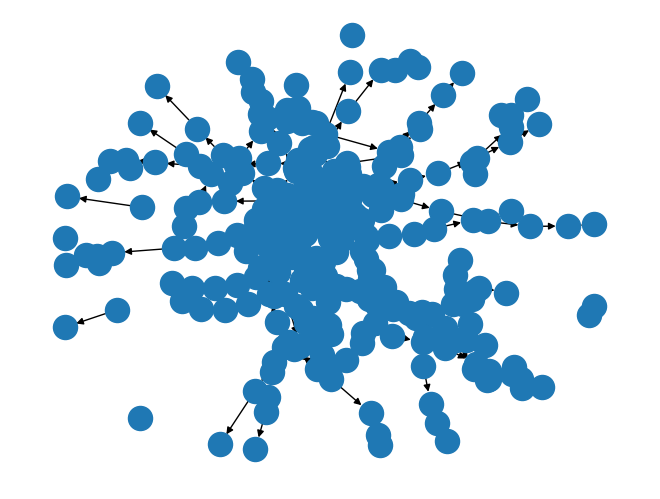

In [78]:
nx.draw(sn)
plt.show()

In [84]:
SAMPLE_SIZE = 20

all_nodes  = [n for n in G.nodes()]
k_0 = np.random.choice(all_nodes, 1)[0]

sampled_network = nx.DiGraph()

for i in range(SAMPLE_SIZE):
    
    out_edges_k0 = [tup[1] for tup in G.out_edges(k_0)]
    
    traversion_proba = np.random.randint(1, 100)

    if traversion_proba <= 85:
        if len(out_edges_k0) > 0:
            k_1 = np.random.choice(out_edges_k0, 1)[0]
            sampled_network.add_edge(k_0, k_1)
        else:
            sampled_network.add_node(k_0)
    
    else:
        k_1 = np.random.choice(all_nodes, 1)[0]
        sampled_network.add_node(k_1)

    k_0 = k_1
    

In [86]:
a = [1, 2, 3]


TypeError: unsupported operand type(s) for /: 'list' and 'int'

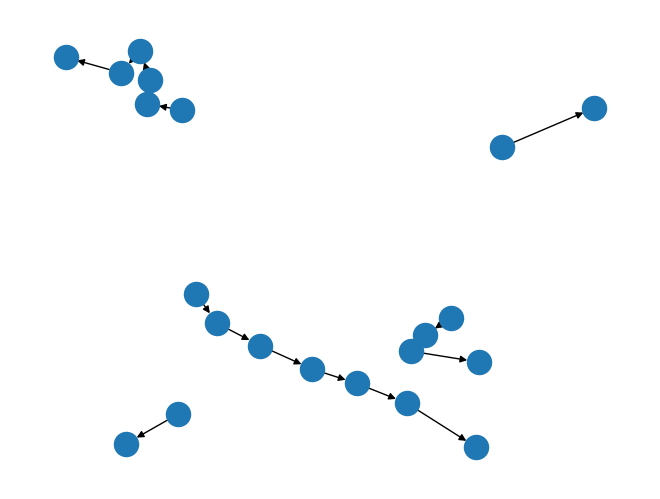

In [85]:
nx.draw(sampled_network)
plt.show()

In [57]:
aG = DPA(N=1000, 
        fm=0.5, 
        d=0.01, 
        plo_M=2.5, 
        plo_m=2.5,
        verbose=False)

In [62]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    sns.histplot(degrees)
    plt.ylabel('Frequency')
    plt.xlabel('Degree')
    plt.show()

C:\Users\timod\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


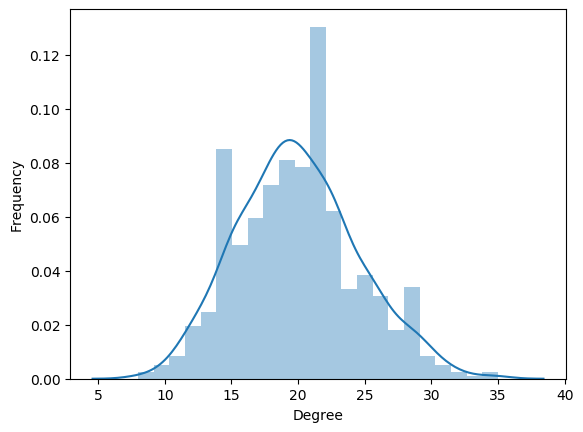

In [70]:
plot_degree_dist(G)

C:\Users\timod\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


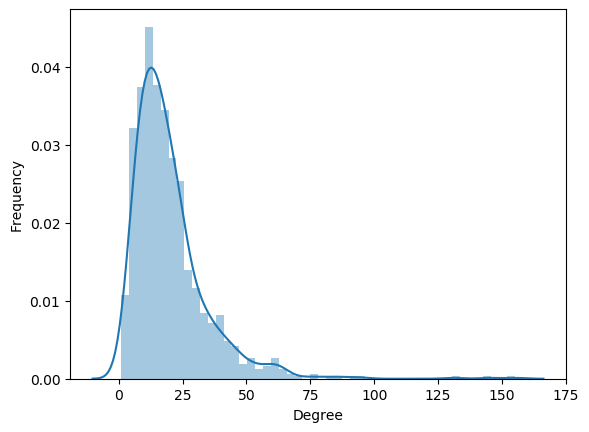

In [64]:
plot_degree_dist(aG)

In [67]:
def plot_degree_dist_per_group(G):
    male_degrees = [G.degree(n[0]) for n in G.nodes(data=True) if n[-1]['gender'] == 0]
    female_degrees = [G.degree(n[0]) for n in G.nodes(data=True) if n[-1]['gender'] == 1]
    
    plt.subplot(1, 2, 1)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
    plt.hist(male_degrees)
    plt.ylabel('Frequency')
    plt.xlabel('Degree')
    plt.title('Male')
    plt.subplot(1, 2, 2)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
    plt.hist(female_degrees)
    plt.xlabel('Degree')
    plt.title('Female')

    plt.show()

C:\Users\timod\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\timod\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


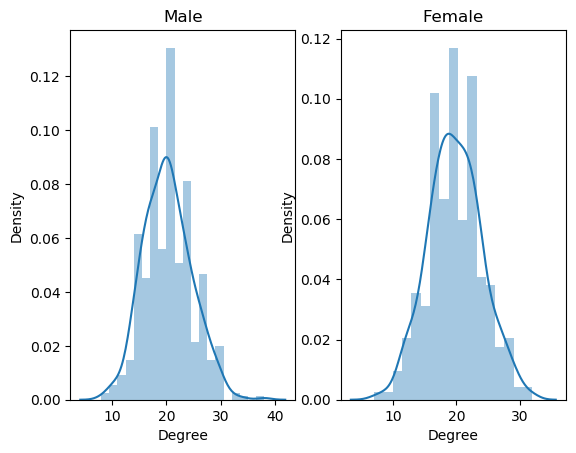

In [68]:
plot_degree_dist_per_group(G)